In [383]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [384]:
input = 'data/'
df = pd.read_excel(input + 'structured-dataset.xlsx', header=1, usecols='A,I,L', sheet_name='Mos_OR')

In [385]:
df.describe()

,response
count,5650.000000
mean,13.277699
std,39.819542
min,-53.000000
25%,-4.000000
50%,1.000000
75%,12.000000
max,265.000000


In [386]:
response_df = df.groupby(['odor', 'or'], as_index=False).response.max()
y_raw = response_df['response'].values.reshape((-1, 1))
y_bin = y_raw > 10
y_bin = y_bin.reshape((-1, 50))
y = StandardScaler().fit_transform(y_raw)
response_df['response_std'] = y
y = y.reshape((-1, 50))
response_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   odor          5600 non-null   object 
 1   or            5600 non-null   object 
 2   response      5600 non-null   float64
 3   response_std  5600 non-null   float64
dtypes: float64(2), object(2)
memory usage: 175.1+ KB


<AxesSubplot:xlabel='response_std', ylabel='Count'>

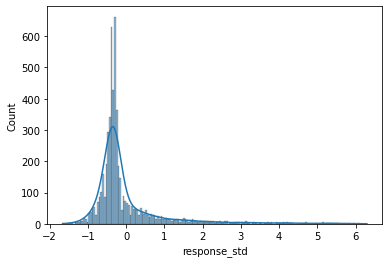

In [387]:
sns.histplot(x='response_std', data=response_df, kde=True)

In [388]:
odor = pd.read_csv(input + 'odor-selected-descriptors-data.csv', sep='#')

In [389]:
X=odor.drop(['odor_sheet_name', 'odor_pubchem_name', 'cid', 'iupac_name', 'isomeric_smiles'], axis=1)

In [390]:
X = StandardScaler().fit_transform(X)

In [391]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error as mse

In [403]:
random_states = list(range(20))
rmse_scores = []
clf = []
for state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=state)
    clf.append(MLPRegressor(hidden_layer_sizes=(50,100, 100), max_iter = 1000, random_state=1).fit(X_train, y_train))
    rmse_scores.append([mse(y_test, clf[state].predict(X_test))**0.5, mse(y_train, clf[state].predict(X_train))**0.5, mse(y, clf[state].predict(X))**0.5])

In [404]:
np.mean(rmse_scores, axis=0)

array([1.2755095 , 0.12157736, 0.58843436])

In [405]:
np.random.shuffle(y_raw)
y_shuffle = StandardScaler().fit_transform(y_raw)
y_shuffle = y_shuffle.reshape((-1, 50))
mse(y_shuffle, y)**0.5

1.4233178920708103

In [406]:
mse(y_test, clf[-1].predict(X_test))**0.5

1.354400235239755